# The Spark Foundation

---



# Data Science & Business Analytics
### Task 6 Prediction using Decision Tree Algorithm :
#### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly



### Name of the Author     : Sayali Redasani
### [Dataset](https://bit.ly/3kXTdox)


#### Importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.warn('ignore warnings')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10392\2973481923.py:7: UserWarning: ignore warnings
  warnings.warn('ignore warnings')


### Data Exploration

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#checking basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#columns of the dats
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#checking how many species are there
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#checking null /missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#checking statical description of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#checking co-relation between numeric columns
numeric_col = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_col.corr()

# Print the correlation matrix
print(correlation_matrix)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm   
Id             1.000000       0.716676     -0.397729       0.882747  \
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<Axes: >

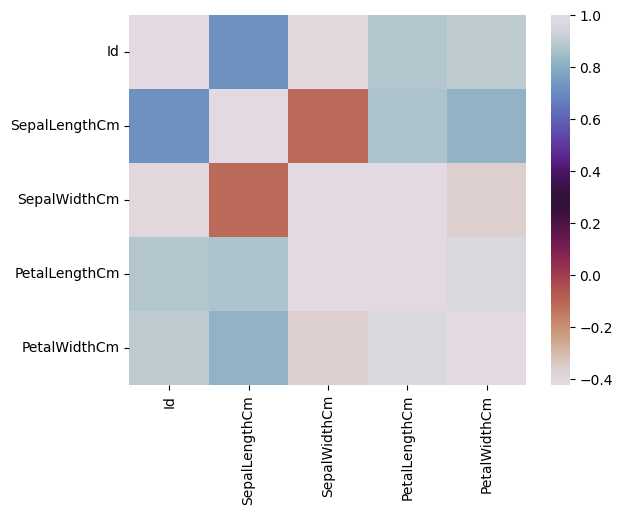

In [11]:
sns.heatmap(numeric_col.corr() , cmap = "twilight_r")

<Axes: >

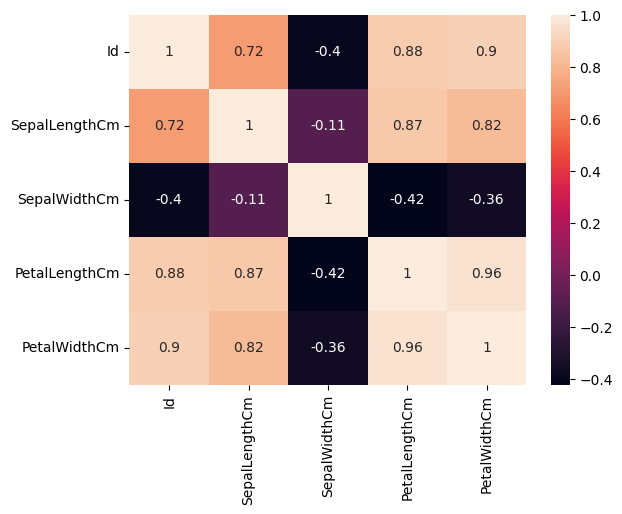

In [12]:
sns.heatmap(numeric_col.corr(),annot=True)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


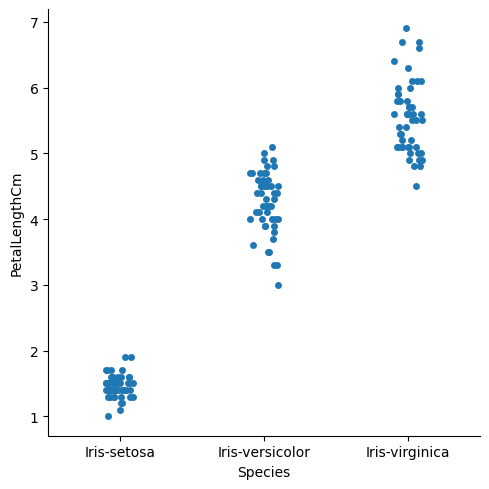

In [14]:
#checking category of petallength in species
sns.catplot(x ='Species',y ='PetalLengthCm', data = data)

In [15]:
x = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,-1].values

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
y_new = ohe.fit_transform(data[['Species']])

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
y_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
df = pd.DataFrame(y_new)
df.rename(columns={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}, inplace=True)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [19]:
result = pd.concat([data,df] ,axis = 1)
result.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [20]:
result

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [21]:
new_x = result.iloc[:,[1,2,3,4]].values
new_y = result.iloc[:,[5,6,7]].values

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
train_x,test_x,train_y,test_y = train_test_split(new_x ,new_y ,test_size = 0.2 ,random_state = 42)

In [29]:
print("Shape of train_x is {}".format(train_x.shape))
print("Shape of train_y is {}".format(train_y.shape))
print("Shape of test_x is  {}".format(test_x.shape))
print("Shape of test_y is  {}".format(test_y.shape))

Shape of train_x is (120, 4)
Shape of train_y is (120, 3)
Shape of test_x is  (30, 4)
Shape of test_y is  (30, 3)


## Decision Tree Algorithm :

In [30]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [ ]:
print("Training Score: ",clf.score(x_train,y_train))

In [32]:
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [ ]:
print(confusion_matrix(y_test,y_pred))

In [33]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-virginica


### making predictions on the test dataset

In [35]:
pred=clf.predict(x_test)  # To make predictions on the test dataset
print(pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']


In [36]:
print(clf.score(x_test,y_test))

0.9473684210526315


### Visualizing the tree

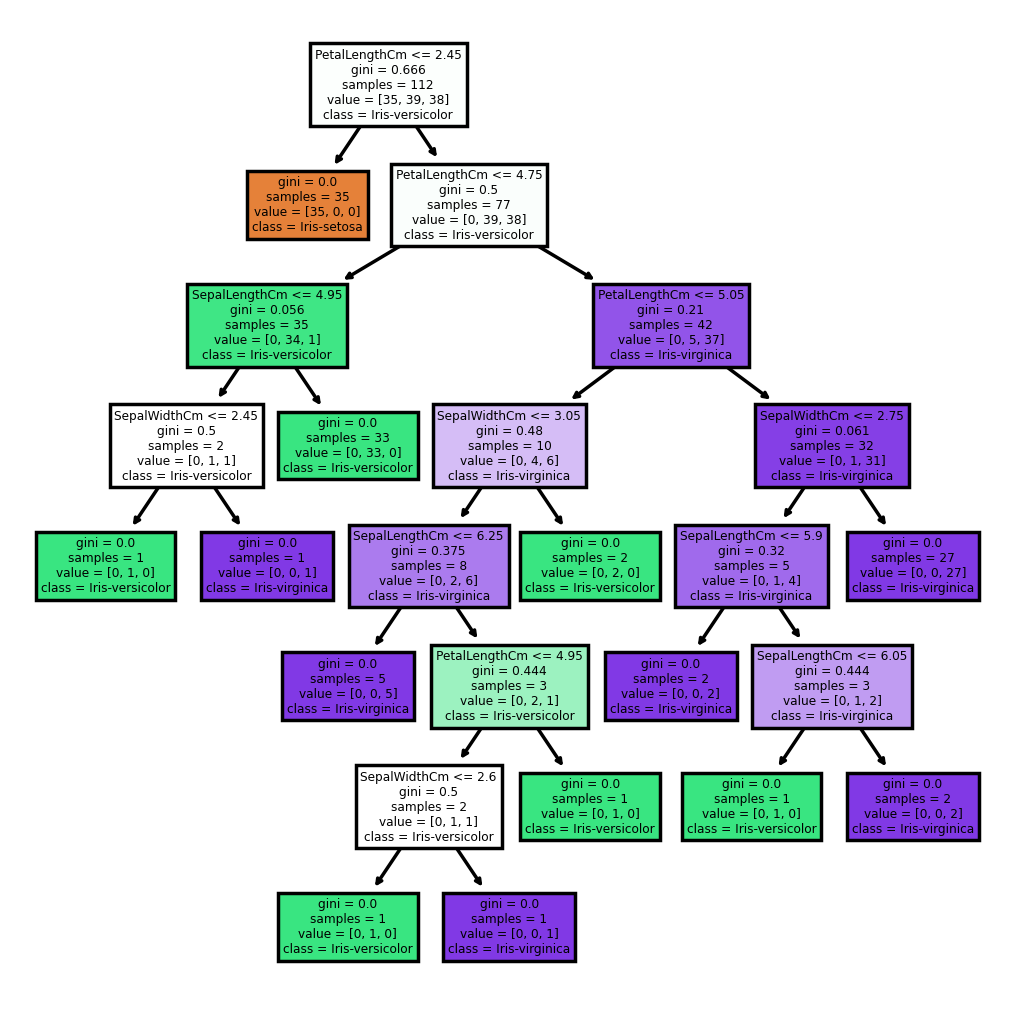

In [37]:
from sklearn import tree

feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')

tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTreeClassifier.png')

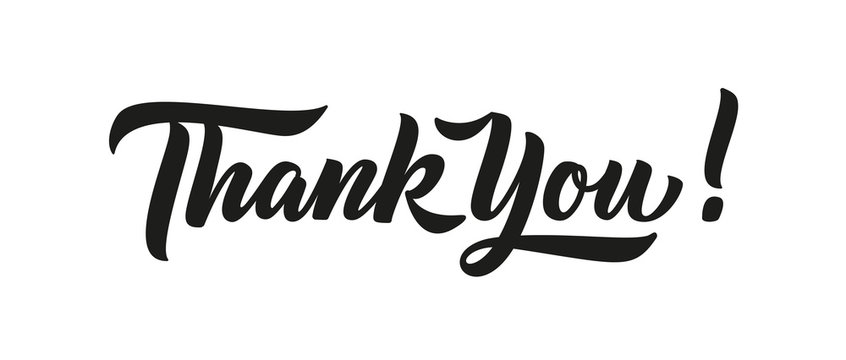